In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact
from os import path

import plotly.graph_objects as go
import pandas as pd

# from quimb import *
import time

ES was loaded!
ES_r_2_LA_6.pdf


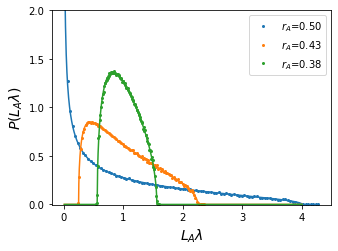

In [2]:
# post processing data

out_dir = 'data/' 
r=2 # local Hilbert space dim
symm=0

La=3
Lb=La
Na=r**La
Nb=r**Lb

if symm==1:
    f1= 'ES_r_%d_LA_%d_symm.npz' % (r,La+Lb)
    Nab_r=r**(La+Lb-1)
else:
    f1= 'ES_r_%d_LA_%d.npz' % (r,La+Lb)
    Nab_r=Na*Nb


fname = out_dir+f1

npzfile = np.load(fname)
v1=npzfile['evals']
L_sw=npzfile['L_sw']
print('ES was loaded!')
    
def MP_dist(N,Q,x):
    # my Q is from Ludwig's paper
    lp=(1+sqrt(Q))**2/N
    ln=(1-sqrt(Q))**2/N
    fx= 1/(2*pi*Q)/x *((lp-x)*(x-ln)+0j)**0.5
    return fx

num_bins = 100

plt.figure(figsize=(4.8,3.6))

# for i_l in range(len(L_sw)):
for i_l in [0,2,4]:

    n, bin_edges = np.histogram(v1[:,i_l], bins=num_bins)
    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    if symm==1:
        n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])*r    
    else:
        n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])  
        
    L=L_sw[i_l]
    Lc=L-La-Lb
#     plt.plot(bins_center,n,'o',markersize=2,color='C%d' % (i_l), label='$N_B$=%d' % (Lc))
    plt.plot(bins_center,n,'o',markersize=2,color='C%d' % (i_l/2), label='$r_A$=%.2f' % ((La+Lb)/L))

    
#     xplot=np.linspace(0.5*np.min(bins_center),1.2*np.max(bins_center),400)
    xplot=np.linspace(0.01,4,1000)
    fx= MP_dist(Nab_r,Na*Nb/r**Lc,xplot/Nab_r)
#     plt.plot(xplot,np.real(fx),color='C%d' % (i_l))
    plt.plot(xplot,np.real(fx),color='C%d' % (i_l/2))

fsize=14
plt.ylim(-0.01,2)
plt.yticks(np.arange(0.,2.1,0.5))
plt.legend()
if symm==1:
    plt.ylabel(r'$P(R^{-1} L_A\lambda)$',fontsize = fsize)
    plt.xlabel(r"$R^{-1} L_A \lambda$",fontsize = fsize)
else:
    plt.ylabel(r'$P(L_A \lambda)$',fontsize = fsize)
    plt.xlabel(r"$L_A \lambda$",fontsize = fsize)
plt.tight_layout()

if symm==1:
    plt.savefig('figs/ES_r_%d_LA_%d_symm.pdf' % (r,La+Lb))
else:
    plt.savefig('figs/ES_r_%d_LA_%d.pdf' % (r,La+Lb))
    print('ES_r_%d_LA_%d.pdf' % (r,La+Lb))
plt.show()

In [18]:
out_dir = 'data/' 
r=2 # local Hilbert space dim
symm=0

La=3
Lb=La
Na=r**La
Nb=r**Lb


if symm==1:
    f1= 'ES_r_%d_LA_%d_symm.npz' % (r,La+Lb)
    Nab_r=r**(La+Lb-1)
else:
    f1= 'ES_r_%d_LA_%d.npz' % (r,La+Lb)
    Nab_r=Na*Nb


fname = out_dir+f1
npzfile = np.load(fname)
v1=npzfile['evals']
L_sw=npzfile['L_sw']
# print('No. of reps: ', npzfile['Nrep'])

def MP_dist(N,Q,x):
    # my Q is from Ludwig's paper
    lp=(1+sqrt(Q))**2/N
    ln=(1-sqrt(Q))**2/N
    fx= 1/(2*pi*Q)/x *((lp-x)*(x-ln)+0j)**0.5
    return fx

num_bins = 100
    
Pn=np.zeros((num_bins,len(L_sw)))
bins_center=np.zeros((num_bins,len(L_sw)))

xplot=np.linspace(0.01,4,1000)
fx=np.zeros((len(xplot),len(L_sw)))
colors=[]

for i_l in range(len(L_sw)):
    L=L_sw[i_l]
    Lc=L-La-Lb

    colors.append('C%d' % (i_l))
    n, bin_edges = np.histogram(v1[:,i_l], bins=num_bins)
    bins_center[:,i_l]= (bin_edges[0:num_bins]+ bin_edges[1:])/2

    fx[:,i_l]= np.real(MP_dist(Nab_r,Na*Nb/r**Lc,xplot/Nab_r))
    if symm==1:
        Pn[:,i_l]= n/np.sum(n)/(bin_edges[1]-bin_edges[0])*r        
    else:
        Pn[:,i_l]= n/np.sum(n)/(bin_edges[1]-bin_edges[0])  


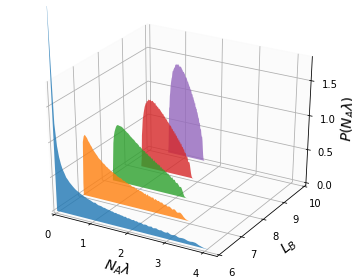

In [28]:
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import axes3d
import numpy as np

# These will be (200, 4), (200, 4), and (4)
# freq_data = np.linspace(0,300,200)[:,None] * np.ones(4)[None,:]
# amp_data = np.random.rand(200*4).reshape((200,4))
# rad_data = np.linspace(0,2,4)

freq_data= bins_center
amp_data= Pn
rad_data= L_sw-(La+Lb)

verts = []
verts_fit = []

for irad in range(len(rad_data)):
    # I'm adding a zero amplitude at the beginning and the end to get a nice
    # flat bottom on the polygons
    xs = np.concatenate([[freq_data[0,irad]], freq_data[:,irad], [freq_data[-1,irad]]])
    ys = np.concatenate([[0],amp_data[:,irad],[0]])
    verts.append(list(zip(xs, ys)))

    xs_fit = np.concatenate([[xplot[0]], xplot[:], [xplot[-1]]])
    ys_fit = np.concatenate([[0], fx[:,irad],[0]])
    verts_fit.append(list(zip(xs_fit, ys_fit)))
    
poly = PolyCollection(verts , facecolors = colors)#, linestyle=':' , edgecolor='black',linewidths=(2,),)
poly.set_alpha(0.8)

# poly_fit = PolyCollection(verts_fit, facecolors = ('None',), edgecolor='black' ,linewidths=(1,),)
# poly_fit.set_alpha(0.2)


# plt.style.use('seaborn-poster')

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(35, 240) # r=2
# ax.view_init(25, 250) # r=3
# ax.view_init(20, 250) # r=3

# The zdir keyword makes it plot the "z" vertex dimension (radius)
# along the y axis. The zs keyword sets each polygon at the
# correct radius value.
ax.add_collection3d(poly, zs=rad_data, zdir='y')
# ax.add_collection3d(poly_fit, zs=rad_data, zdir='y')

ax.set_xlim3d(freq_data.min(), freq_data.max())
ax.set_ylim3d(rad_data.min(), rad_data.max())
ax.set_yticks(rad_data)
ax.set_xticks(np.arange(0,4.1,1)) # r=2
zmax=1.8 # r=2
ax.set_zticks(np.arange(0,zmax,0.5)) # r=2
ax.set_zlim3d(0,zmax)


xc=0.97
ac=0.4
ax.w_xaxis.set_pane_color((xc,xc,xc, ac))
ax.w_yaxis.set_pane_color((xc,xc,xc, ac))
ax.w_zaxis.set_pane_color((xc,xc,xc, ac))


fsize=14
ax.set_ylabel(r"$L_B$",fontsize = fsize)
if symm==1:
    ax.set_zlabel(r'$P(R^{-1} N_A \lambda)$',fontsize = fsize)
    ax.set_xlabel(r"$R^{-1} N_A \lambda$",fontsize = fsize)
else:
    ax.set_zlabel(r'$P(N_A \lambda)$',fontsize = fsize)
    ax.set_xlabel(r"$N_A \lambda$",fontsize = fsize)

plt.tight_layout()
if symm==1:
    plt.savefig('figs/ES3d_r_%d_LA_%d_symm.pdf' % (r,La+Lb))
else:
    plt.savefig('figs/ES3d_r_%d_LA_%d.pdf' % (r,La+Lb))
plt.show()